In [1]:
import pandas as pd

In [2]:
# number of days
# 2017 = 365
# 2018 = 365
# 2019 = 365
number_of_days = 365 * 3

In [3]:
df = pd.read_csv('oil-prices/wti-daily.csv', index_col='Date', parse_dates=True)
df

Price
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87
...           ...
2020-01-21  58.25
2020-01-22  56.76
2020-01-23  55.51
2020-01-24  54.09
2020-01-27  53.09

[8586 rows x 1 columns]

In [4]:
df = df.drop(df[(df.index < '2017-01-01') | (df.index >= '2020-01-01')].index)
df

Price
Date             
2017-01-03  52.36
2017-01-04  53.26
2017-01-05  53.77
2017-01-06  53.98
2017-01-09  51.95
...           ...
2019-12-24  61.17
2019-12-26  61.72
2019-12-27  61.76
2019-12-30  61.66
2019-12-31  61.14

[749 rows x 1 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2017-01-03 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   749 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


In [6]:
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.Price.fillna(method='bfill', inplace=True)
df.Price = df.Price.apply(lambda x: x * 100).astype('int')

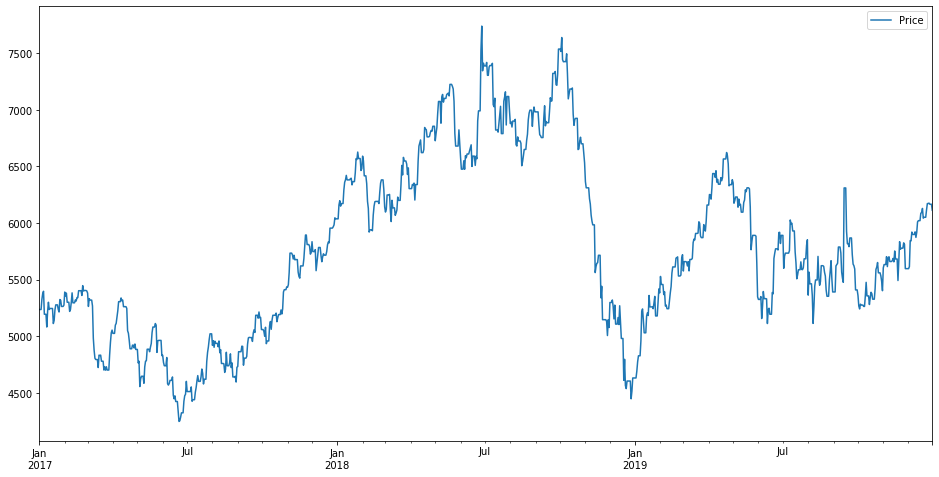

In [7]:
df.plot(figsize=(16,8))

In [8]:
df.to_csv('oil-prices/wti-2017-2019.csv',index_label='Date')